In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [39]:
# Configurar pandas para exibir mais colunas e linhas
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
# pd.set_option('display.max_rows', None)

In [40]:
#Load dataset
df_gym = pd.read_csv('gym_members_exercise_tracking.csv')
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the Gender column
df_gym['Gender_Encoded'] = le.fit_transform(df_gym['Gender'])

# Apply Label Encoding to the Workout_Type column
df_gym['Workout_Type_Encoded'] = le.fit_transform(df_gym['Workout_Type'])

# Show the updated dataframe
df_gym[['Gender', 'Gender_Encoded', 'Workout_Type', 'Workout_Type_Encoded']].head()
# uuu

,Gender,Gender_Encoded,Workout_Type,Workout_Type_Encoded
0,Male,1,Yoga,3
1,Female,0,HIIT,1
2,Female,0,Cardio,0
3,Male,1,Strength,2
4,Male,1,Strength,2


In [42]:
df_gym_new= df_gym.drop(columns=['Gender', 'Workout_Type'])
df_gym_new.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Encoded,Workout_Type_Encoded
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,1,3
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0,1
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,0,0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,1,2
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,1,2


In [43]:
df_gym_new.shape

(973, 15)

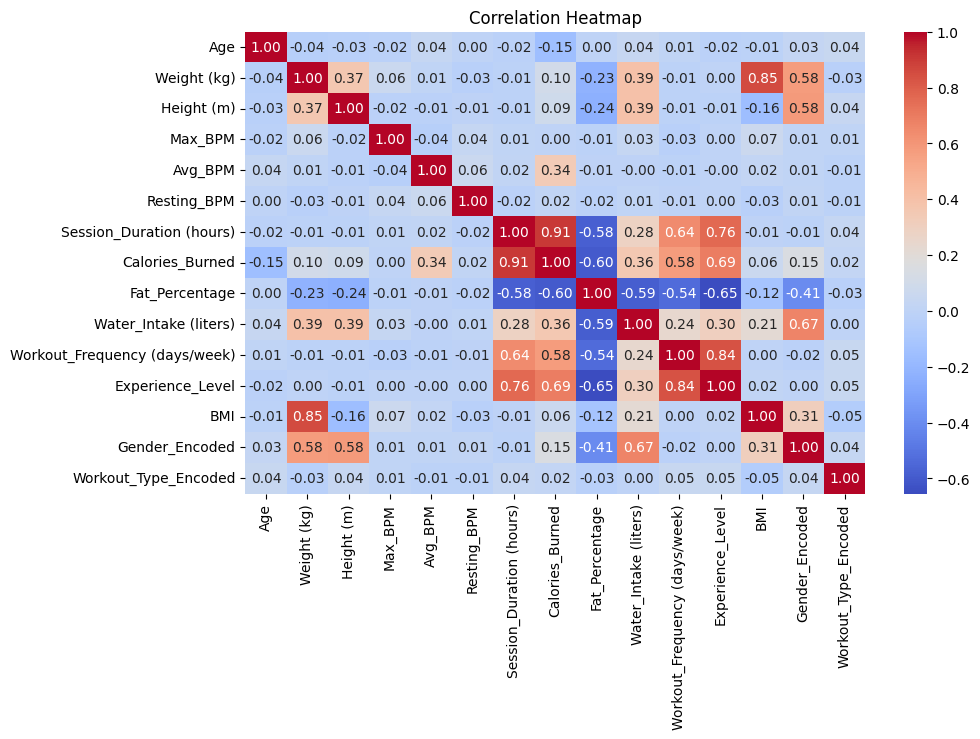

In [44]:
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_gym_new.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [45]:
#Separe training dataset from the target attribute
X = df_gym_new.drop(columns=['Experience_Level'])  # Variáveis independentes
print(X)

     Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56         88.3        1.71      180      157           60   
1     46         74.9        1.53      179      151           66   
2     32         68.1        1.66      167      122           54   
3     25         53.2        1.70      190      164           56   
4     38         46.1        1.79      188      158           68   
..   ...          ...         ...      ...      ...          ...   
968   24         87.1        1.74      187      158           67   
969   25         66.6        1.61      184      166           56   
970   59         60.4        1.76      194      120           53   
971   32        126.4        1.83      198      146           62   
972   46         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                        1.69           1313.0            12.6   
1                        1.30            883.0     

In [46]:
#Take the last attribute as a target
y = df_gym_new['Experience_Level']  # Variável dependente (alvo)
print(y)

0      3
1      2
2      2
3      1
4      1
      ..
968    3
969    1
970    3
971    2
972    1
Name: Experience_Level, Length: 973, dtype: int64


In [47]:
unique_elements, counts_elements = np.unique(X, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[0.000e+00 5.000e-01 5.100e-01 ... 1.725e+03 1.766e+03 1.783e+03]
 [7.170e+02 1.000e+00 5.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]]


In [48]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  1   2   3]
 [376 406 191]]


In [49]:
# 4. Padronizar os atributos preditores
# O K-NN é sensível à escala dos dados, então precisamos normalizar
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [50]:
#######################################################################
#Cross Validation
neigh = KNeighborsClassifier(n_neighbors=3,weights='distance')
predictions_train = cross_val_predict(neigh,X,y,cv=10)

In [51]:
#Compute accuracy
accuracy_score(y,predictions_train)*100

69.7841726618705

In [52]:
#Gera a matriz de confusão do treino
confusion_matrix(y,predictions_train)

array([[216, 154,   6],
       [107, 285,  14],
       [  2,  11, 178]])

<Axes: >

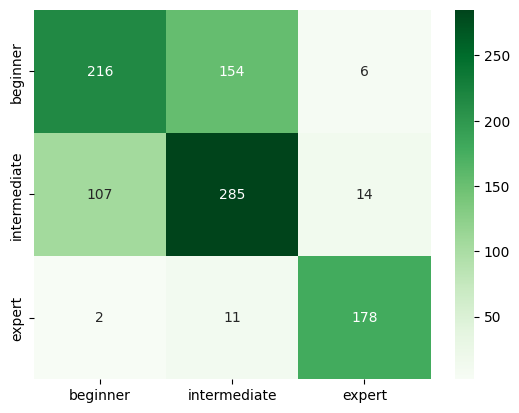

In [53]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
import seaborn as sns
cf = confusion_matrix(y,predictions_train)
lbl1=['beginner', 'intermediate', 'expert']
lbl2 = ['beginner', 'intermediate', 'expert']
sns.heatmap(cf,annot=True,cmap="Greens", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [54]:
#Separe training dataset from the target attribute
X = df_gym_new.drop(columns=['Experience_Level','Age','Max_BPM', 'Avg_BPM','Resting_BPM','Fat_Percentage', 'Workout_Type_Encoded' ])  # Variáveis independentes
print(X)

     Weight (kg)  Height (m)  Session_Duration (hours)  Calories_Burned  \
0           88.3        1.71                      1.69           1313.0   
1           74.9        1.53                      1.30            883.0   
2           68.1        1.66                      1.11            677.0   
3           53.2        1.70                      0.59            532.0   
4           46.1        1.79                      0.64            556.0   
..           ...         ...                       ...              ...   
968         87.1        1.74                      1.57           1364.0   
969         66.6        1.61                      1.38           1260.0   
970         60.4        1.76                      1.72            929.0   
971        126.4        1.83                      1.10            883.0   
972         88.7        1.63                      0.75            542.0   

     Water_Intake (liters)  Workout_Frequency (days/week)    BMI  \
0                      3.5     

In [55]:
X.shape

(973, 8)

In [56]:
#Take the last attribute as a target
y = df_gym_new['Experience_Level']  # Variável dependente (alvo)
print(y)

0      3
1      2
2      2
3      1
4      1
      ..
968    3
969    1
970    3
971    2
972    1
Name: Experience_Level, Length: 973, dtype: int64


In [57]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  1   2   3]
 [376 406 191]]


In [58]:
# 4. Padronizar os atributos preditores
# O K-NN é sensível à escala dos dados, então precisamos normalizar
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [59]:
neigh = KNeighborsClassifier(n_neighbors=3,weights='distance')
predictions_train = cross_val_predict(neigh,X,y,cv=10)

In [60]:
#Compute accuracy
accuracy_score(y,predictions_train)*100

63.00102774922919

In [61]:
#Gera a matriz de confusão do treino
confusion_matrix(y,predictions_train)

array([[210, 149,  17],
       [117, 246,  43],
       [  9,  25, 157]])

<Axes: >

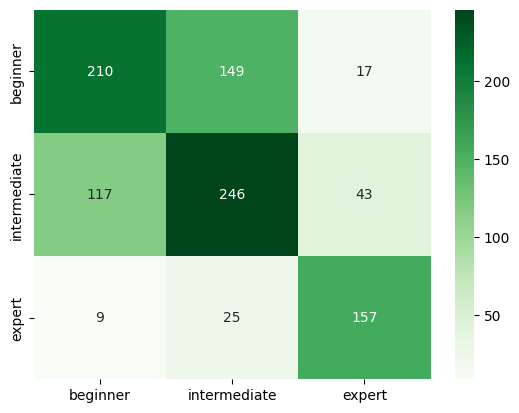

In [62]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
import seaborn as sns
cf = confusion_matrix(y,predictions_train)
lbl1=['beginner', 'intermediate', 'expert']
lbl2 = ['beginner', 'intermediate', 'expert']
sns.heatmap(cf,annot=True,cmap="Greens", fmt="d",xticklabels=lbl1,yticklabels=lbl2)